In [8]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

In [9]:
import matplotlib.pyplot as plt
from basics.point import Point
from basics.line import Line
from basics.polygon import Polygon

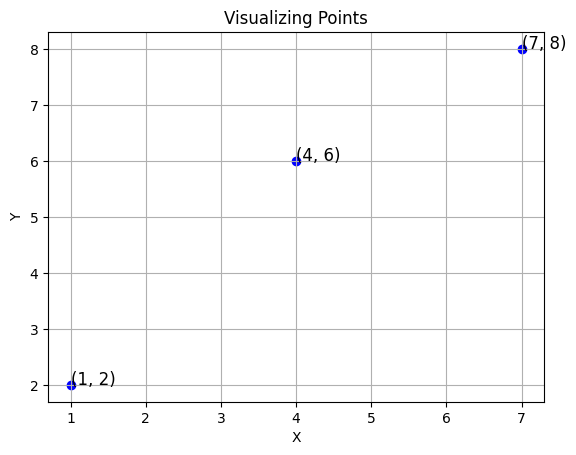

Distance between p1 and p2: 5.0
Distance between p2 and p3: 3.605551275463989


In [10]:
# Create some points
p1 = Point(1, 2)
p2 = Point(4, 6)
p3 = Point(7, 8)

# Display the points
plt.scatter([p1.x, p2.x, p3.x], [p1.y, p2.y, p3.y], color='blue')
plt.text(p1.x, p1.y, f"({p1.x}, {p1.y})", fontsize=12)
plt.text(p2.x, p2.y, f"({p2.x}, {p2.y})", fontsize=12)
plt.text(p3.x, p3.y, f"({p3.x}, {p3.y})", fontsize=12)

plt.title("Visualizing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Print distances between points
print(f"Distance between p1 and p2: {p1.distance_to(p2)}")
print(f"Distance between p2 and p3: {p2.distance_to(p3)}")

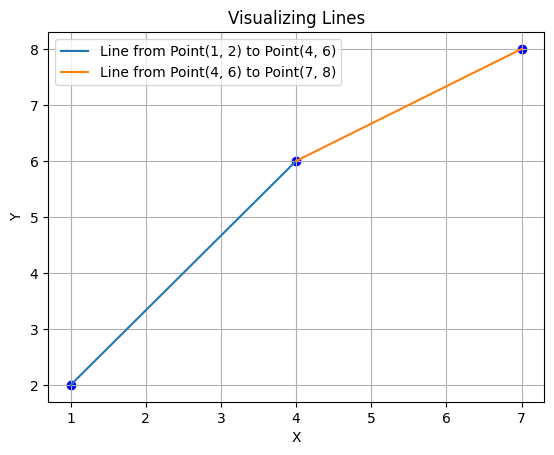

Line1 length: 5.0, slope: 1.3333333333333333
Line2 length: 3.605551275463989, slope: 0.6666666666666666


In [11]:
# Create lines from the points
line1 = Line(p1, p2)
line2 = Line(p2, p3)

# Plot the lines
plt.plot([p1.x, p2.x], [p1.y, p2.y], label=f'Line from {p1} to {p2}')
plt.plot([p2.x, p3.x], [p2.y, p3.y], label=f'Line from {p2} to {p3}')

# Display points again for clarity
plt.scatter([p1.x, p2.x, p3.x], [p1.y, p2.y, p3.y], color='blue')

plt.title("Visualizing Lines")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

# Print line details
print(f"Line1 length: {line1.length()}, slope: {line1.slope()}")
print(f"Line2 length: {line2.length()}, slope: {line2.slope()}")

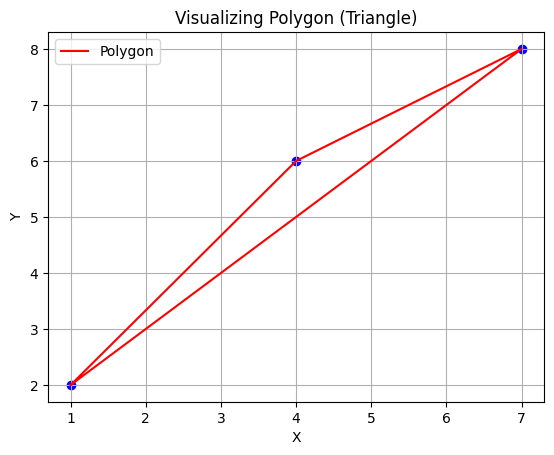

Perimeter of polygon: 17.09083264970256
Area of polygon: 3.0


In [12]:
# Create a polygon (triangle)
polygon = Polygon([p1, p2, p3])

# Plot the polygon
polygon_x = [p.x for p in polygon.vertices] + [polygon.vertices[0].x]  # Close the polygon
polygon_y = [p.y for p in polygon.vertices] + [polygon.vertices[0].y]

plt.plot(polygon_x, polygon_y, 'r-', label='Polygon')

# Display points
plt.scatter([p1.x, p2.x, p3.x], [p1.y, p2.y, p3.y], color='blue')

plt.title("Visualizing Polygon (Triangle)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

# Print polygon details
print(f"Perimeter of polygon: {polygon.perimeter()}")
print(f"Area of polygon: {polygon.area()}")

In [13]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
from dataclasses import dataclass
from typing import List, Tuple
import math

""" to be honest I think I was adhering to the textbook a little too closely for the style of code.
I'm gonna try to be a little more true to the style I usually code in going forward rewriting the code for Plotly"""

@dataclass
class Point:
    x: float
    y: float
    
    def distance_to(self, other: 'Point') -> float:
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    
    def __str__(self):
        return f"({self.x}, {self.y})"

class Line:
    def __init__(self, p1: Point, p2: Point):
        self.p1 = p1
        self.p2 = p2
    
    def length(self) -> float:
        return self.p1.distance_to(self.p2)
    
    def slope(self) -> float:
        if self.p2.x - self.p1.x == 0:
            return float('inf')
        return (self.p2.y - self.p1.y) / (self.p2.x - self.p1.x)
    
    def midpoint(self) -> Point:
        return Point((self.p1.x + self.p2.x)/2, (self.p1.y + self.p2.y)/2)

class Polygon:
    def __init__(self, vertices: List[Point]):
        self.vertices = vertices
    
    def perimeter(self) -> float:
        total = 0
        for i in range(len(self.vertices)):
            p1 = self.vertices[i]
            p2 = self.vertices[(i + 1) % len(self.vertices)]
            total += p1.distance_to(p2)
        return total
    
    def area(self) -> float:
        # shoelace formula
        area = 0
        n = len(self.vertices)
        for i in range(n):
            j = (i + 1) % n
            area += self.vertices[i].x * self.vertices[j].y
            area -= self.vertices[j].x * self.vertices[i].y
        return abs(area) / 2

class GeometricVisualization:
    def __init__(self):
        self.fig = None
        self.points = []
        self.lines = []
        self.polygon = None
        self.current_step = 0
        
    def add_point(self, x: float, y: float):
        self.points.append(Point(x, y))
    
    def add_line(self, p1: Point, p2: Point):
        self.lines.append(Line(p1, p2))
    
    def create_polygon(self):
        if len(self.points) >= 3:
            self.polygon = Polygon(self.points)
    
    def update_figure(self, show_points=True, show_lines=True, show_polygon=True):
        self.fig = go.Figure()
        
        # Plot points
        if show_points and self.points:
            x = [p.x for p in self.points]
            y = [p.y for p in self.points]
            self.fig.add_trace(go.Scatter(
                x=x, y=y,
                mode='markers',
                name='Points',
                marker=dict(size=10, color='blue')
            ))
        
        # Plot lines
        if show_lines and self.lines:
            for line in self.lines:
                self.fig.add_trace(go.Scatter(
                    x=[line.p1.x, line.p2.x],
                    y=[line.p1.y, line.p2.y],
                    mode='lines',
                    name=f'Line (length={line.length():.2f})',
                    line=dict(color='red')
                ))
        
        # Plot polygon
        if show_polygon and self.polygon:
            x = [p.x for p in self.polygon.vertices] + [self.polygon.vertices[0].x]
            y = [p.y for p in self.polygon.vertices] + [self.polygon.vertices[0].y]
            self.fig.add_trace(go.Scatter(
                x=x, y=y,
                mode='lines',
                name=f'Polygon (area={self.polygon.area():.2f})',
                line=dict(color='green', width=2)
            ))
        
        self.fig.update_layout(
            title='Geometric Primitives Visualization',
            xaxis_title='X',
            yaxis_title='Y',
            showlegend=True,
            width=800,
            height=600
        )
        
        # Make the plot square and set equal axes
        self.fig.update_yaxes(
            scaleanchor="x",
            scaleratio=1
        )

def create_interactive_visualization():
    """Create interactive visualization with controls"""
    vis = GeometricVisualization()
    
    # Add sample points
    vis.add_point(1, 2)
    vis.add_point(4, 6)
    vis.add_point(7, 8)
    
    # Create lines between points
    vis.add_line(vis.points[0], vis.points[1])
    vis.add_line(vis.points[1], vis.points[2])
    
    # Create polygon
    vis.create_polygon()
    
    # Create controls
    point_checkbox = widgets.Checkbox(
        value=True,
        description='Show Points',
        disabled=False
    )
    
    line_checkbox = widgets.Checkbox(
        value=True,
        description='Show Lines',
        disabled=False
    )
    
    polygon_checkbox = widgets.Checkbox(
        value=True,
        description='Show Polygon',
        disabled=False
    )
    
    # Add information display
    info_text = widgets.HTML(
        value="""<h3>Geometric Properties:</h3>"""
    )
    
    def update_info():
        info = "<h3>Geometric Properties:</h3><ul>"
        if vis.points:
            for i, point in enumerate(vis.points):
                info += f"<li>Point {i+1}: ({point.x}, {point.y})</li>"
        if vis.lines:
            for i, line in enumerate(vis.lines):
                info += f"<li>Line {i+1} length: {line.length():.2f}</li>"
                info += f"<li>Line {i+1} slope: {line.slope():.2f}</li>"
        if vis.polygon:
            info += f"<li>Polygon area: {vis.polygon.area():.2f}</li>"
            info += f"<li>Polygon perimeter: {vis.polygon.perimeter():.2f}</li>"
        info += "</ul>"
        info_text.value = info
    
    def update(change):
        vis.update_figure(
            point_checkbox.value,
            line_checkbox.value,
            polygon_checkbox.value
        )
        update_info()
        display(vis.fig)
    
    # Connect callbacks
    point_checkbox.observe(update, names='value')
    line_checkbox.observe(update, names='value')
    polygon_checkbox.observe(update, names='value')
    
    # Create layout
    controls = widgets.VBox([
        widgets.HBox([point_checkbox, line_checkbox, polygon_checkbox]),
        info_text
    ])
    
    display(controls)
    update({'new': True})  # Initial update
    
    return vis

In [14]:
visualization = create_interactive_visualization()